## Exercício Avaliativo

Estudo e criação de um modelo de Florestas Aleatórias (RandomForestClassifier) 

In [74]:
print("Marcelo Nascimento da Silva")

Marcelo Nascimento da Silva


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# carregamento dos dados da aula 
url = "https://raw.githubusercontent.com/lopes-andre/datasets/main/credito.csv"

df = pd.read_csv(url)
df.head()

,saldo_corrente,duracao_emp_meses,historico_credito,motivo,quantia,saldo_poupanca,tempo_empregado,porcentagem_renda,anos_residencia,idade,outro_credito,residencia,qtd_emprestimos_existentes,emprego,dependentes,telefone,inadimplente
0,< 0 DM,6.0,critico,moveis/eletrodomesticos,1169,desconhecido,> 7 anos,4.0,4.0,67,nenhum,propria,2,qualificado,1,sim,nao
1,1 - 200 DM,48.0,bom,moveis/eletrodomesticos,5951,< 100 DM,1 - 4 anos,2.0,2.0,22,nenhum,propria,1,qualificado,1,nao,sim
2,desconhecido,12.0,critico,educacao,2096,< 100 DM,4 - 7 anos,2.0,3.0,49,nenhum,propria,1,nao-qualificado,2,nao,nao
3,< 0 DM,42.0,bom,moveis/eletrodomesticos,7882,< 100 DM,4 - 7 anos,2.0,4.0,45,nenhum,outros,1,qualificado,2,nao,nao
4,< 0 DM,24.0,ruim,carro,4870,< 100 DM,1 - 4 anos,3.0,4.0,53,nenhum,outros,2,qualificado,2,nao,sim


## Sem GridSearch aplicado ao modelo

In [77]:
# reduzir as variáveis categóricas
codificadores_categoria = {}
colunas_categoricas = df.select_dtypes(include=['object']).columns

for coluna in colunas_categoricas:
    codificador = LabelEncoder()
    df[coluna] = codificador.fit_transform(df[coluna])
    codificadores_categoria[coluna] = codificador

# separar as variáveis independentes (X) e variável dependente (y)
X = df.drop('inadimplente', axis=1)
y = df['inadimplente']

In [78]:
# divisão de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# treino do RandomForestClassifier

# 100 é um valor padrão comum que fornece um bom desempenho e tempo de computação
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_treino, y_treino)

RandomForestClassifier(random_state=42)

In [80]:
# avaliação do modelo
y_predito = classifier.predict(X_teste)

In [81]:
# acuracia 
print("Acurácia:", accuracy_score(y_teste, y_predito))

Acurácia: 0.78


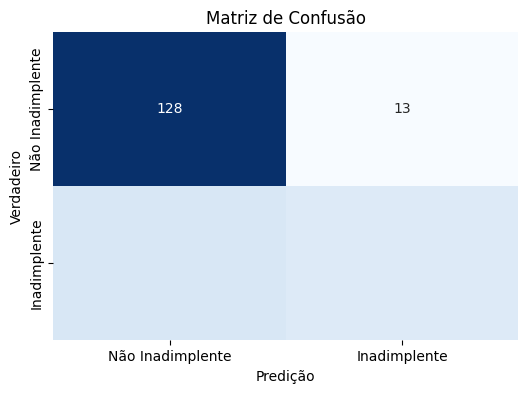

In [82]:
# matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_predito)

# plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=['Não Inadimplente', 'Inadimplente'], yticklabels=['Não Inadimplente', 'Inadimplente'])
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [83]:
print("Relatório de Classificação:\n", classification_report(y_teste, y_predito))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.91      0.85       141
           1       0.68      0.47      0.56        59

    accuracy                           0.78       200
   macro avg       0.74      0.69      0.71       200
weighted avg       0.77      0.78      0.77       200



## Com GridSearch aplicado ao modelo

In [84]:
# grade de parâmetros para o GridSearch
parametros_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [85]:
# usa o GridSearchCV para encontrar os melhores parâmetros
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=parametros_grid,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # usa todos os processadores disponíveis
                           verbose=2)

# treina o GridSearch
grid_search.fit(X_treino, y_treino)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             verbose=2)

In [86]:
# melhores parâmetros
melhores_parametros = grid_search.best_params_
print("Melhores parâmetros encontrados:", melhores_parametros)


Melhores parâmetros encontrados: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [87]:
# treino do modelo com os melhores parâmetros
melhor_modelo = grid_search.best_estimator_
melhor_modelo.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [88]:
y_predito = melhor_modelo.predict(X_teste)

# resultados da avaliação
print("Acurácia:", accuracy_score(y_teste, y_predito))

Acurácia: 0.77


In [89]:
print("Relatório de Classificação:\n", classification_report(y_teste, y_predito))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       141
           1       0.69      0.41      0.51        59

    accuracy                           0.77       200
   macro avg       0.74      0.66      0.68       200
weighted avg       0.76      0.77      0.75       200



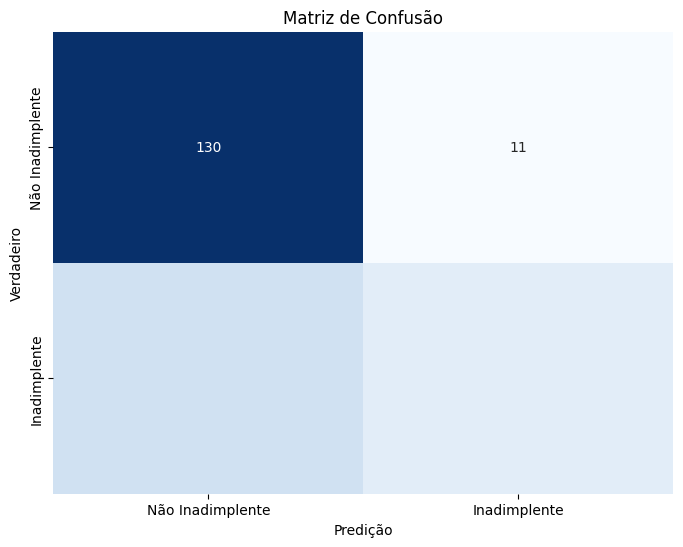

In [90]:
matriz_confusao = confusion_matrix(y_teste, y_predito)

# plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Não Inadimplente', 'Inadimplente'], yticklabels=['Não Inadimplente', 'Inadimplente'])
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()